In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,precision_recall_curve,roc_curve,average_precision_score
from sklearn.feature_selection import RFE

In [2]:
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

In [10]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [33]:
df.shape

(299, 13)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [15]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [19]:
df.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [20]:
x=df.drop('DEATH_EVENT',axis=1)

In [21]:
y=df['DEATH_EVENT']

In [31]:
x.shape,y.shape

((299, 12), (299,))

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
y.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [24]:
smote=SMOTE(random_state=1)

In [25]:
x_resampled,y_resampled=smote.fit_resample(x,y)

In [28]:
#x_resampled.value_counts()
y_resampled.value_counts()

DEATH_EVENT
1    203
0    203
Name: count, dtype: int64

In [32]:
x_resampled.shape,y_resampled.shape

((406, 12), (406,))

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1,)

In [35]:
X_train.shape,X_test.shape

((239, 12), (60, 12))

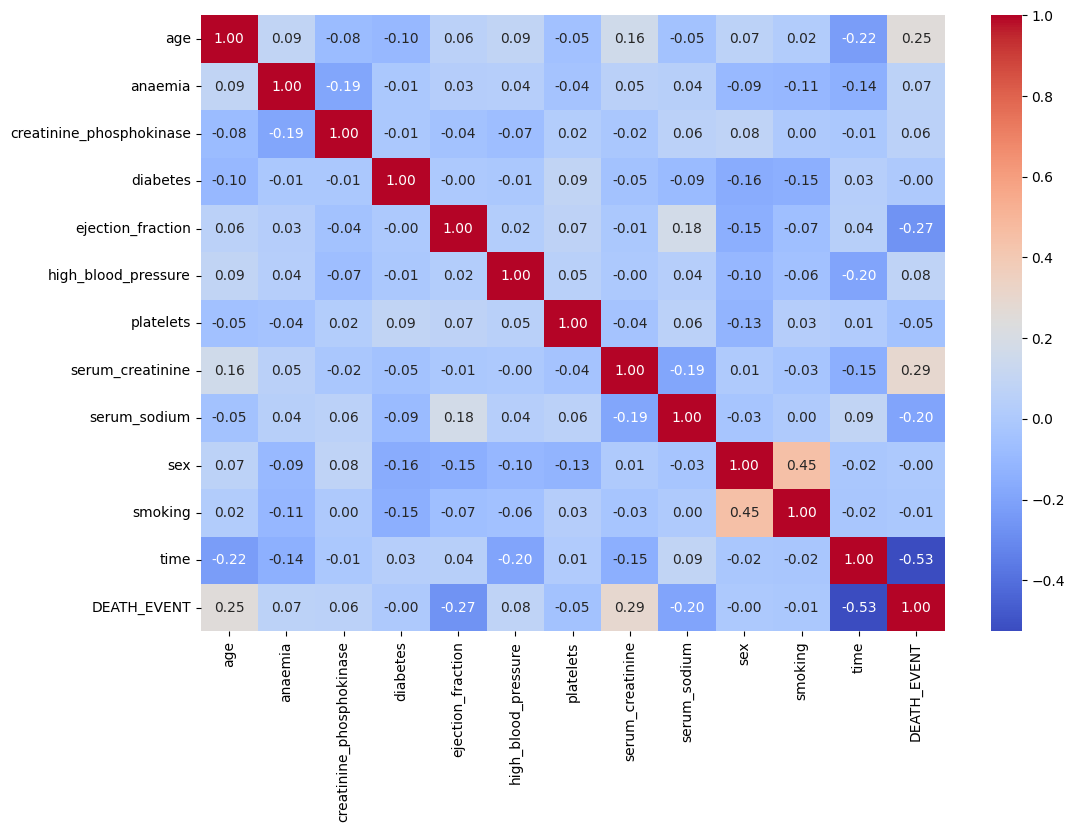

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

In [37]:
scaler=StandardScaler()

In [38]:
X_train_scaled=scaler.fit_transform(X_train)

In [39]:
X_test_scaled=scaler.fit_transform(X_test)

In [40]:
X_train_scaled

array([[-1.33194278,  1.11069566, -0.4576634 , ...,  0.72941845,
         1.52297224, -0.10575054],
       [-0.4999137 , -0.90033664, -0.51894319, ...,  0.72941845,
        -0.65661079,  1.33189826],
       [ 0.58172409,  1.11069566,  0.39546617, ...,  0.72941845,
        -0.65661079,  0.86979686],
       ...,
       [ 1.99617352, -0.90033664,  5.04985768, ...,  0.72941845,
         1.52297224, -0.73472189],
       [ 1.33055026,  1.11069566, -0.47777083, ...,  0.72941845,
        -0.65661079,  1.02383066],
       [ 1.74656479,  1.11069566,  0.23652172, ..., -1.37095517,
        -0.65661079, -1.27384019]])

In [42]:
#1st Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=8)
rfe.fit(X_train_scaled, Y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

In [43]:
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [52]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-layer Perceptron": MLPClassifier(),
}

In [51]:
from sklearn.neural_network import MLPClassifier

In [53]:
metrics = {'accuracy': accuracy_score, 'precision': precision_score, 'recall': recall_score, 'f1': f1_score}

In [54]:
best_model = None
best_metrics = {metric: 0 for metric in metrics}

In [58]:
for name, classifier in classifiers.items():
    if name != 'LightGBM':

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('classifier', classifier)
            ])

            if name in ['Random Forest']:
                param_grid = {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__max_depth': [None, 10, 20, 30],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4],
                    'classifier__max_features': ['sqrt']  # Set max_features explicitly to 'sqrt'
                }
            elif name in ['Gradient Boosting', 'XGBoost']:
                param_grid = {
                    'classifier__n_estimators': [50, 100, 200],
                    'classifier__learning_rate': [0.01, 0.1, 0.5],
                    'classifier__max_depth': [3, 5, 7]
                }
            elif name == 'Logistic Regression':
                param_grid = {
                    'classifier__C': [0.1, 1, 10],
                    'classifier__penalty': ['l1', 'l2']
                }
            elif name == 'Decision Tree':
                param_grid = {
                    'classifier__max_depth': [None, 10, 20, 30],
                    'classifier__min_samples_split': [2, 5, 10],
                    'classifier__min_samples_leaf': [1, 2, 4]
                }
            else:
                param_grid = {}

            #cross validation
            grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=0)  # Set verbose to 0
            grid_search.fit(X_train, Y_train)


            best_estimator = grid_search.best_estimator_
            y_pred = best_estimator.predict(X_test)

            # Calculate evaluation metrics
            metrics_values = {}
            for metric, func in metrics.items():
                metrics_values[metric] = func(Y_test, y_pred)


            print(f"\nClassifier: {name}")
            for metric, value in metrics_values.items():
                print(f"{metric.capitalize()}: {value:.4f}")

            # Update best model if current model has higher accuracy
            if metrics_values['accuracy'] > best_metrics['accuracy']:
                best_model = best_estimator
                best_metrics = metrics_values

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 


Classifier: Logistic Regression
Accuracy: 0.8833
Precision: 0.7692
Recall: 0.7143
F1: 0.7407

Classifier: Decision Tree
Accuracy: 0.8333
Precision: 0.6111
Recall: 0.7857
F1: 0.6875

Classifier: Random Forest
Accuracy: 0.9167
Precision: 0.8462
Recall: 0.7857
F1: 0.8148

Classifier: Gradient Boosting
Accuracy: 0.8667
Precision: 0.7500
Recall: 0.6429
F1: 0.6923

Classifier: Support Vector Machine
Accuracy: 0.9000
Precision: 0.8333
Recall: 0.7143
F1: 0.7692

Classifier: K-Nearest Neighbors
Accuracy: 0.7833
Precision: 0.5556
Recall: 0.3571
F1: 0.4348

Classifier: Naive Bayes
Accuracy: 0.8333
Precision: 0.7500
Recall: 0.4286
F1: 0.5455

Classifier: Multi-layer Perceptron
Accuracy: 0.8667
Precision: 0.7143
Recall: 0.7143
F1: 0.7143


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
param_grid=

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [60]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10))])

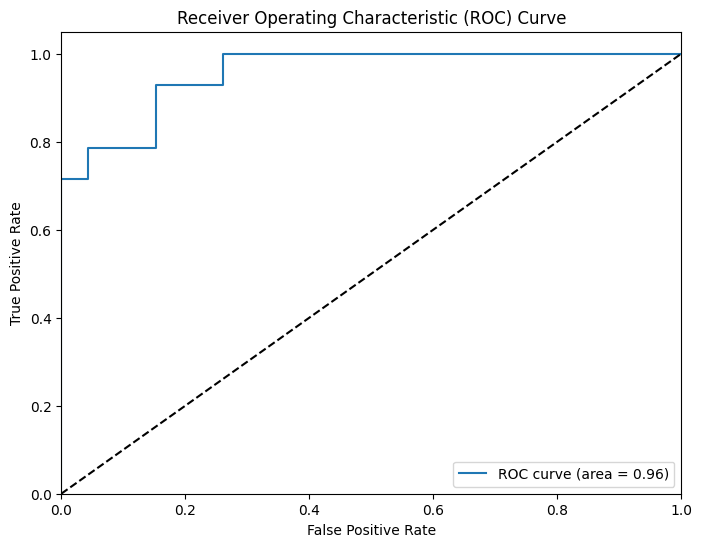

In [67]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(Y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [64]:
y_prob = best_model.predict_proba(X_test)
y_prob

array([[0.68934833, 0.31065167],
       [0.86228886, 0.13771114],
       [0.3515276 , 0.6484724 ],
       [0.90018863, 0.09981137],
       [0.91123206, 0.08876794],
       [0.91883364, 0.08116636],
       [0.84912916, 0.15087084],
       [0.42423471, 0.57576529],
       [0.27853231, 0.72146769],
       [0.93266966, 0.06733034],
       [0.56618105, 0.43381895],
       [0.38318762, 0.61681238],
       [0.25577664, 0.74422336],
       [0.69883578, 0.30116422],
       [0.67604075, 0.32395925],
       [0.93226059, 0.06773941],
       [0.49434186, 0.50565814],
       [0.5815629 , 0.4184371 ],
       [0.94576932, 0.05423068],
       [0.90001288, 0.09998712],
       [0.8462495 , 0.1537505 ],
       [0.31119672, 0.68880328],
       [0.54773014, 0.45226986],
       [0.29460283, 0.70539717],
       [0.98210684, 0.01789316],
       [0.87089849, 0.12910151],
       [0.79599231, 0.20400769],
       [0.81203485, 0.18796515],
       [0.74662932, 0.25337068],
       [0.77168089, 0.22831911],
       [0.

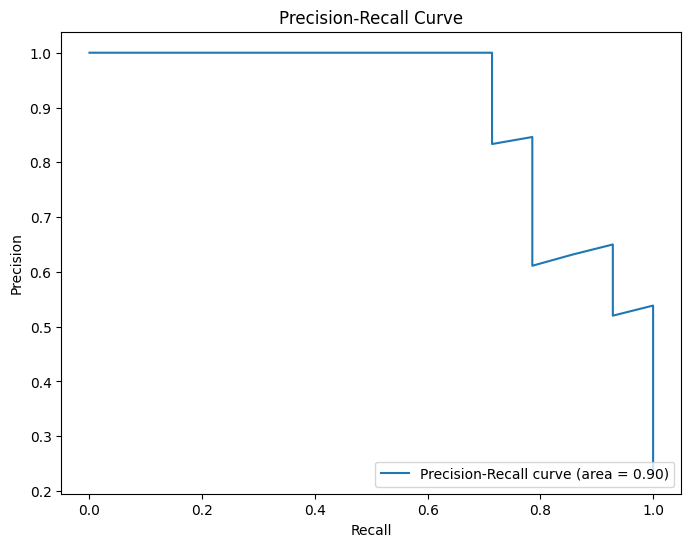

In [71]:
precision, recall, _ = precision_recall_curve(Y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % average_precision_score(Y_test, y_prob))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.1, 0.5, 1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
if name == 'Logistic Regression':
    param_grid = {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    }
else:
    param_grid = {}

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [ ]:
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
]

In [ ]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_rfe, y_train)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

In [ ]:
print("Best parameters found: ", grid_search.best_params_)